In [8]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import streamlit as st
import joblib

In [9]:
# Read the dataset with the correct delimiter
df = pd.read_csv(r'C:\Users\Halil\Desktop\projectcsv\bank-additional.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [10]:
# statistical info
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
# check for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# Check if there are any duplicates
duplicates = df.duplicated()

# Display the number of duplicates
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [11]:
# Convert numeric columns to appropriate types
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                   'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert invalid values to NaN if needed

In [12]:
# Convert categorical columns to 'category' type
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [13]:
# Create a dictionary for binary encoding
binary_dict = {'yes': 1, 'no': 0}

# Apply the dictionary mapping to your binary columns
binary_columns = ['default', 'housing', 'loan', 'y']
for col in binary_columns:
    df[col] = df[col].apply(lambda x: binary_dict.get(x, x))  # using .get to handle missing values safely

In [14]:
# Apply the dictionary mapping to your binary columns
binary_dict = {'yes': 1, 'no': 0}
df['default'] = df['default'].map(binary_dict).fillna(0)  # Default to 0 for unknown values
df['housing'] = df['housing'].map(binary_dict).fillna(0)
df['loan'] = df['loan'].map(binary_dict).fillna(0)

In [15]:
# Check the updated data types
print(df.dtypes)

age                  int64
job               category
marital           category
education         category
default            float64
housing            float64
loan               float64
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int64
dtype: object


In [16]:
# List of columns to be label encoded (Ordinal Categorical)
label_encoded_cols = ['education']  # Add more ordinal columns if needed

# Create LabelEncoder instance
le = LabelEncoder()

# Apply LabelEncoder to each of the columns
for col in label_encoded_cols:
    df[col] = le.fit_transform(df[col])

In [17]:
# List of columns to apply One-Hot Encoding (Nominal Categorical)
one_hot_encoded_cols = ['job', 'marital', 'contact', 'month', 'day_of_week', 'poutcome']

# Apply One-Hot Encoding using pd.get_dummies
df = pd.get_dummies(df, columns=one_hot_encoded_cols, drop_first=True)

In [14]:
print(df.head())

   age  education  default  housing  loan  duration  campaign  pdays  \
0   30          2      0.0      0.0   0.0       487         2    999   
1   39          3      0.0      0.0   0.0       346         4    999   
2   25          3      0.0      0.0   0.0       227         1    999   
3   38          2      0.0      0.0   0.0        17         3    999   
4   47          6      0.0      0.0   0.0        58         1    999   

   previous  emp.var.rate  ...  month_may  month_nov  month_oct  month_sep  \
0         0          -1.8  ...       True      False      False      False   
1         0           1.1  ...       True      False      False      False   
2         0           1.4  ...      False      False      False      False   
3         0           1.4  ...      False      False      False      False   
4         0          -0.1  ...      False       True      False      False   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0            False       

In [15]:
# Define numeric columns for outlier detection
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                   'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Calculate IQR for each numeric column
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check the calculated bounds
print(lower_bound)
print(upper_bound)


age                  9.5000
duration          -218.0000
campaign            -2.0000
pdays              999.0000
previous             0.0000
emp.var.rate        -6.6000
cons.price.idx      91.6965
cons.conf.idx      -52.1500
euribor3m           -4.1065
nr.employed       4905.6000
dtype: float64
age                 69.5000
duration           638.0000
campaign             6.0000
pdays              999.0000
previous             0.0000
emp.var.rate         6.2000
cons.price.idx      95.3725
cons.conf.idx      -26.9500
euribor3m           10.4015
nr.employed       5421.6000
dtype: float64


<Axes: >

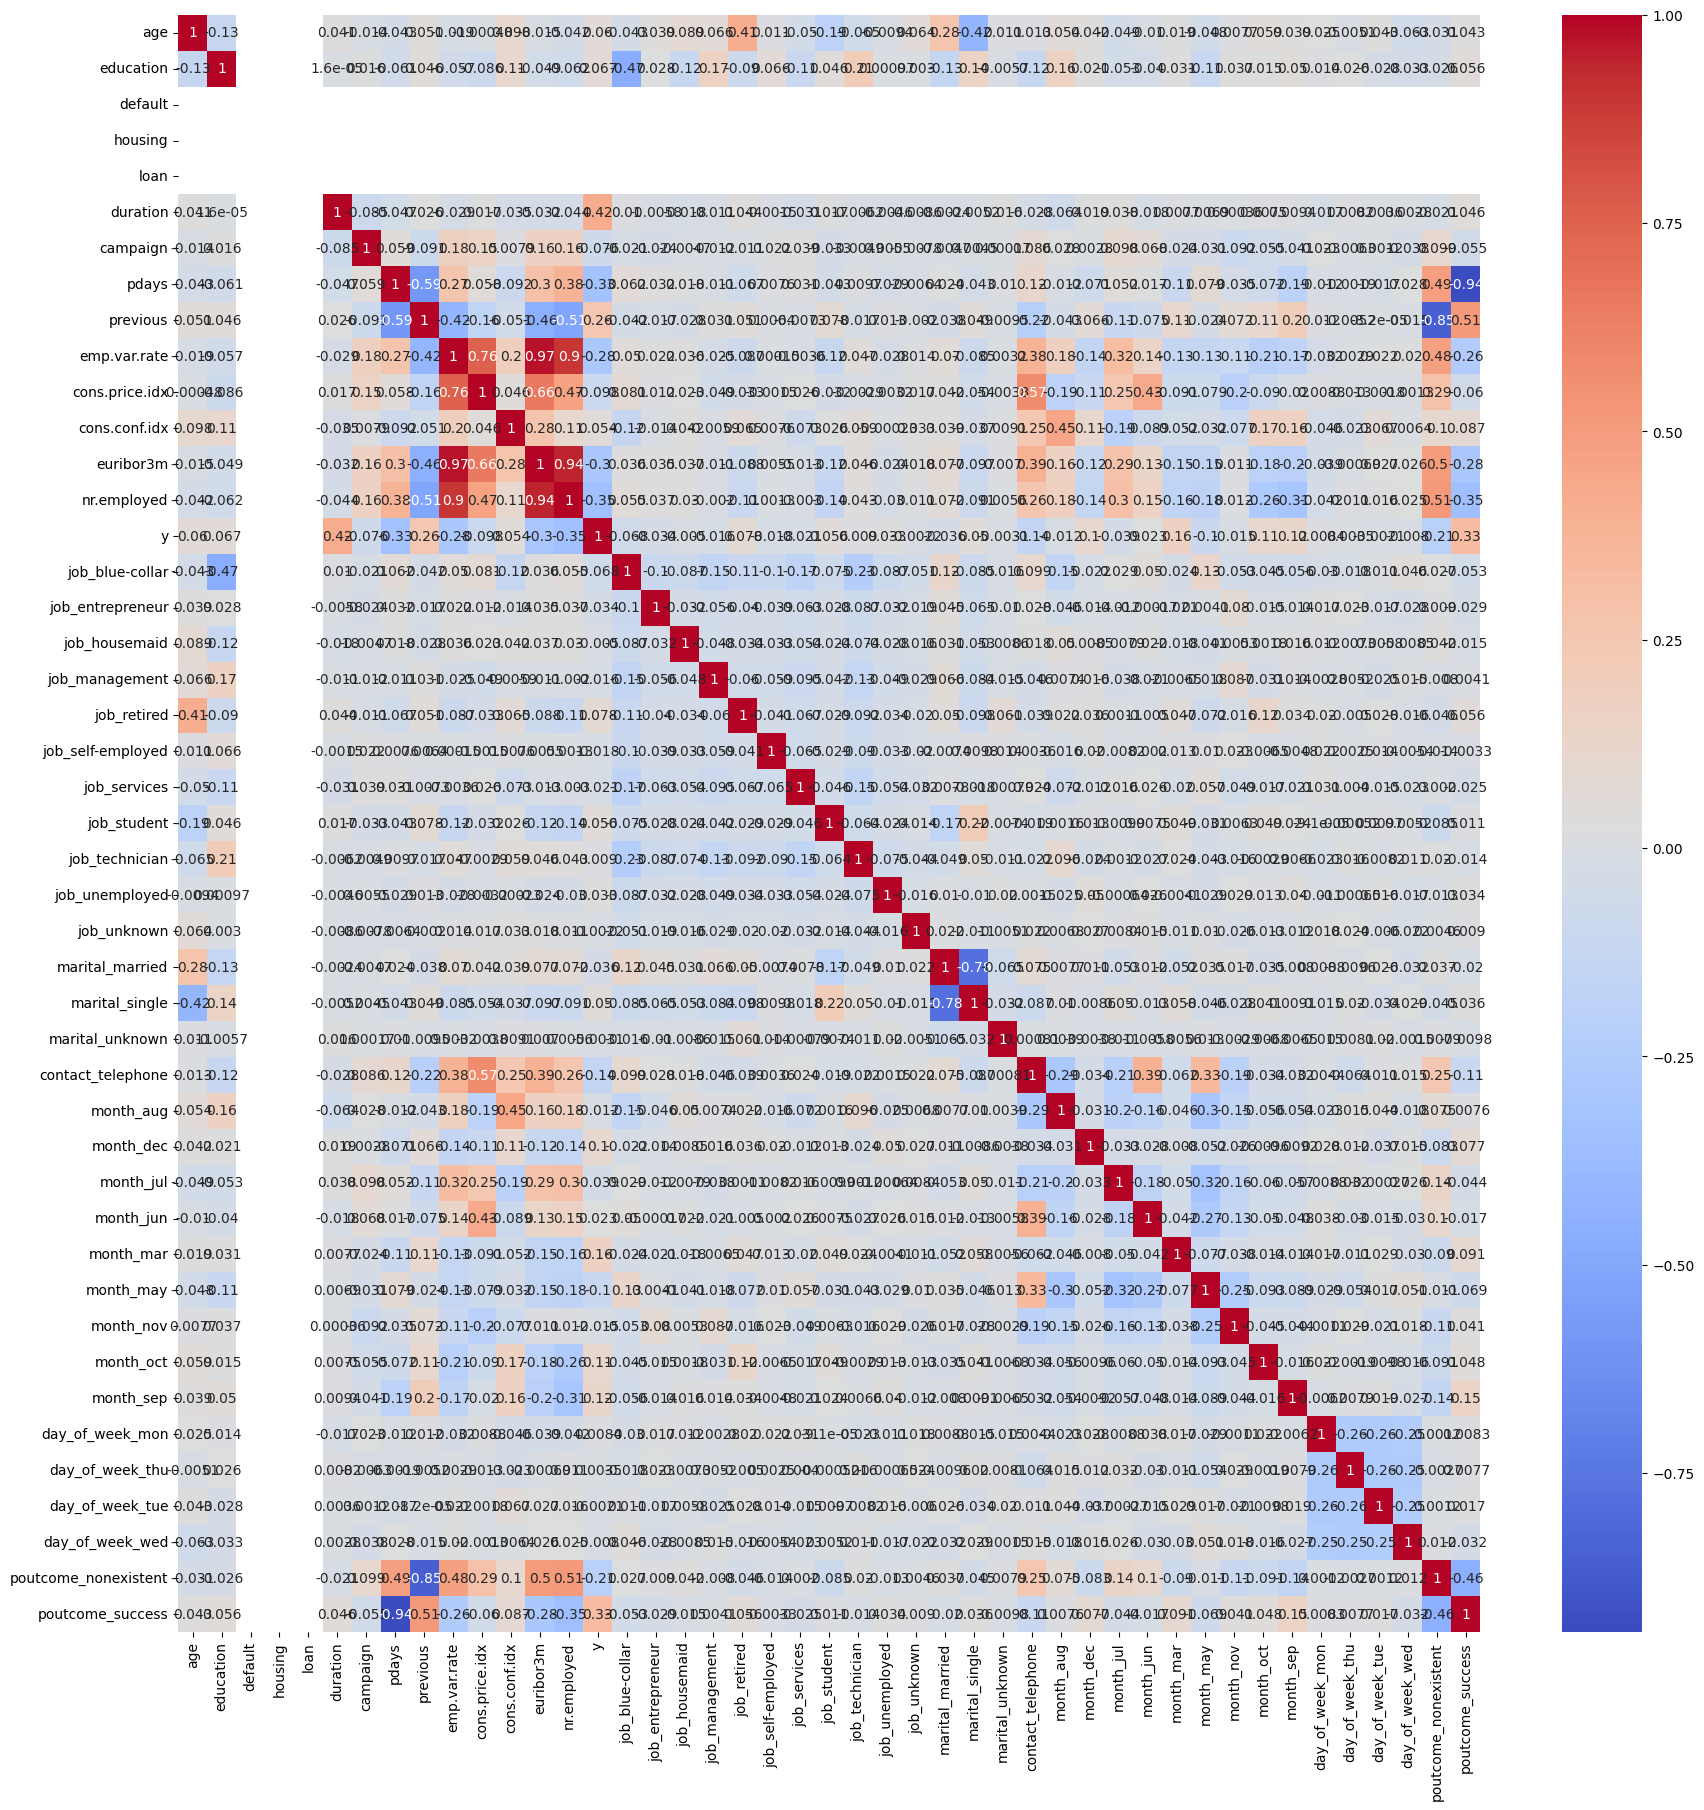

In [16]:
corr = df.corr()
plt.figure(figsize=(21,21))
sns.heatmap(corr, annot=True, cmap='coolwarm')


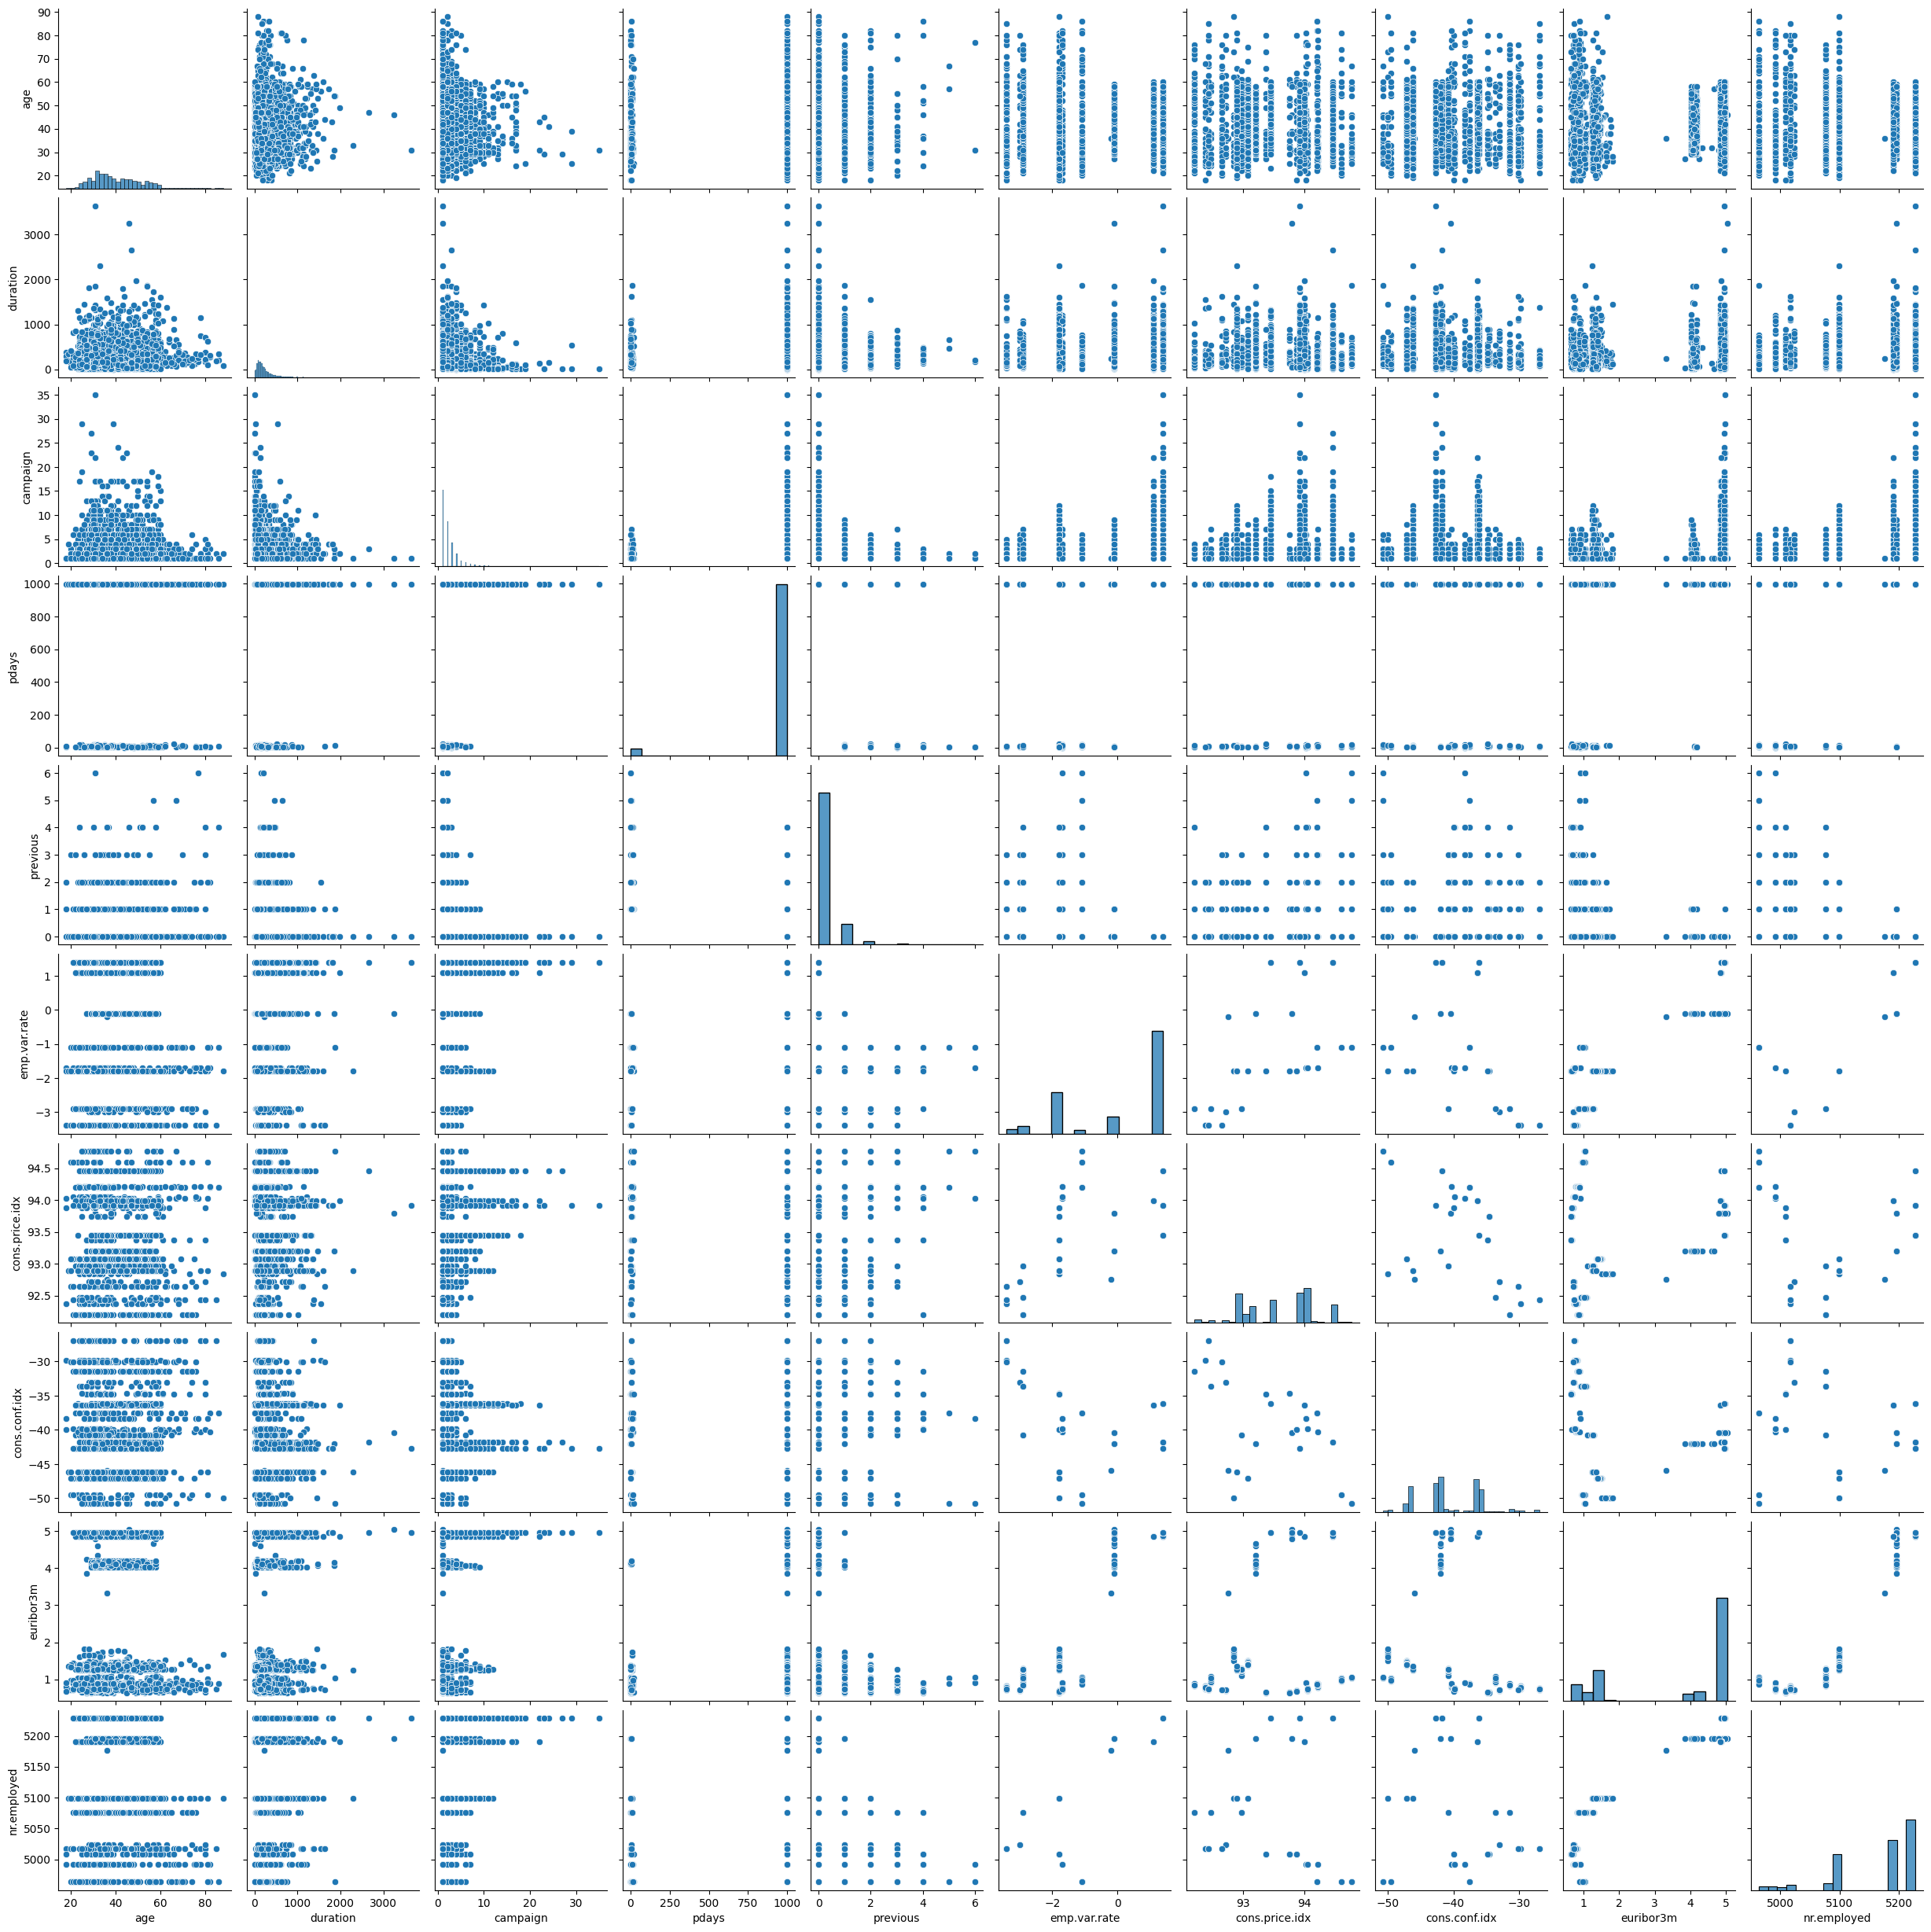

In [17]:
# Pairplot for multiple numeric columns
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                   'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                   'euribor3m', 'nr.employed']
sns.pairplot(df[numeric_columns])
plt.show()

#it seems to me we don't need to exclude outliers they could carry information i'm not sure.

In [18]:
from sklearn.preprocessing import StandardScaler

# Numeric columns
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                   'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [19]:
# Define the feature columns (X) and the target column (y)
X = df.drop('y', axis=1)  # Drop the target column
y = df['y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=500)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [21]:
# Make predictions
y_pred = model.predict(X_test)

In [22]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[720  14]
 [ 52  38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       734
           1       0.73      0.42      0.54        90

    accuracy                           0.92       824
   macro avg       0.83      0.70      0.75       824
weighted avg       0.91      0.92      0.91       824


Accuracy: 0.92


In [23]:
# Get feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
importance = importance.sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(importance)


Feature Importance:
                 Feature  Coefficient
33             month_mar     1.758222
5               duration     1.307624
43      poutcome_success     0.967451
32             month_jun     0.867339
42  poutcome_nonexistent     0.751430
26        marital_single     0.627352
25       marital_married     0.360783
27       marital_unknown     0.302754
11         cons.conf.idx     0.275856
41       day_of_week_wed     0.274878
39       day_of_week_thu     0.261107
10        cons.price.idx     0.250174
30             month_dec     0.243794
38       day_of_week_mon     0.239624
23        job_unemployed     0.220885
16         job_housemaid     0.208219
31             month_jul     0.177532
12             euribor3m     0.164390
8               previous     0.159404
29             month_aug     0.155933
22        job_technician     0.141775
40       day_of_week_tue     0.065216
0                    age     0.048730
2                default     0.000000
3                housing     

C:\Users\Halil\AppData\Local\Temp\ipykernel_23000\2967144536.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance, palette='viridis')


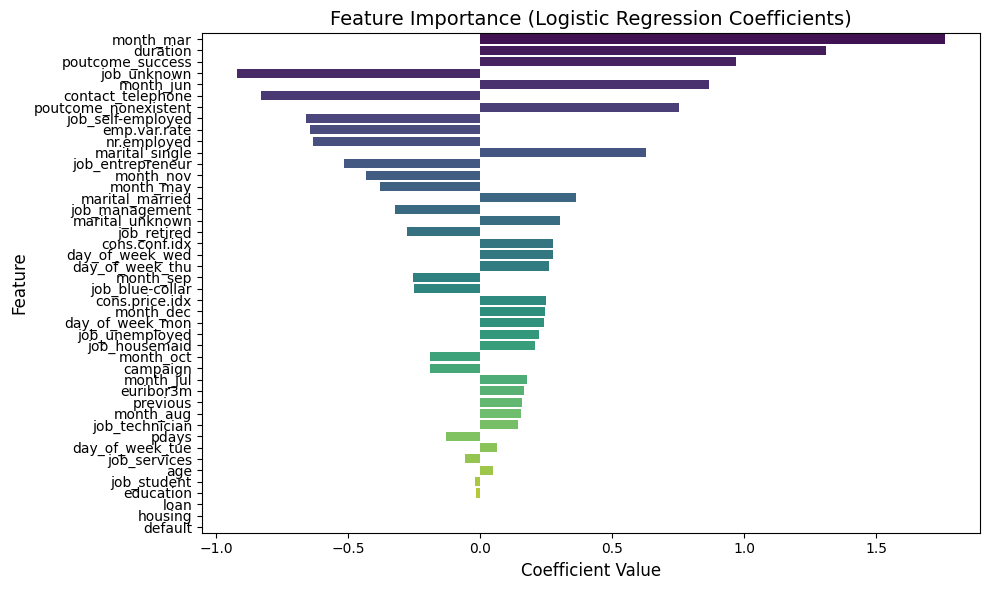

In [24]:
# Get feature importance (coefficients)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by the absolute value of coefficients for better visualization
importance['AbsCoefficient'] = importance['Coefficient'].abs()
importance = importance.sort_values(by='AbsCoefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance, palette='viridis')

# Add labels and title
plt.title('Feature Importance (Logistic Regression Coefficients)', fontsize=14)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['y'])  # Drop the target variable
y = df['y']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy:", accuracy)

NameError: name 'df' is not defined

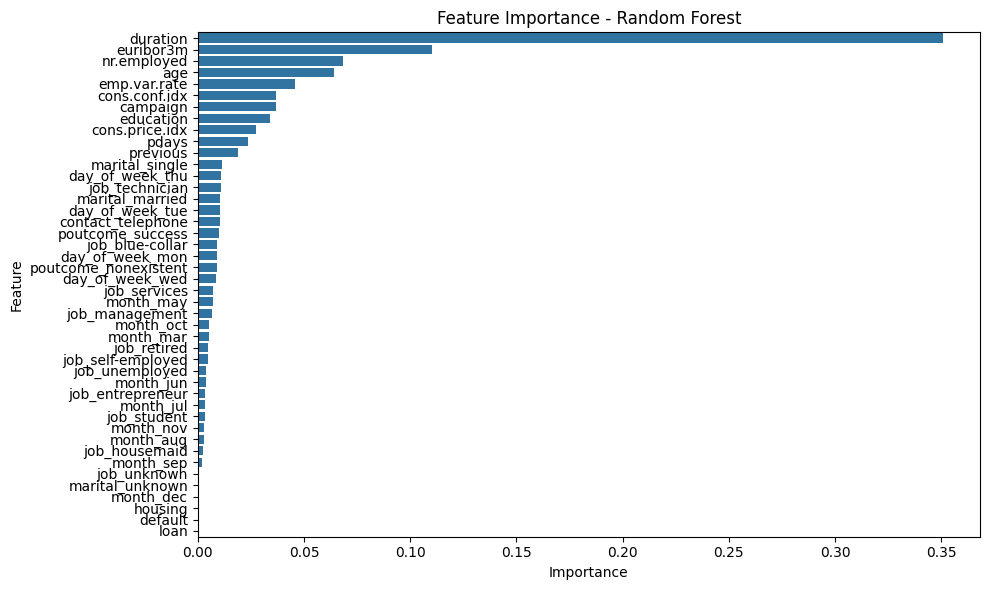

In [26]:
# Get feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [27]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['y'])  # Drop the target variable
y = df['y']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)  # Using a linear kernel for simplicity

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[721  13]
 [ 59  31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       734
           1       0.70      0.34      0.46        90

    accuracy                           0.91       824
   macro avg       0.81      0.66      0.71       824
weighted avg       0.90      0.91      0.90       824


Accuracy: 0.912621359223301


In [28]:
# Define the model
logreg = LogisticRegression(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # Try both L1 and L2 penalties
    'solver': ['liblinear', 'lbfgs', 'saga'],  # 'liblinear' supports 'l1', 'lbfgs' supports 'l2'
    'max_iter': [100, 200, 500]
}
# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_logreg = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_logreg.predict(X_test)
print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy on Test Set: 0.9186893203883495


C:\Users\Halil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Halil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Halil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Halil\AppData\Local\Programs\Python\Python39\lib\site-packages\s

In [29]:
logreg = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='liblinear')

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9223300970873787


In [30]:
# Split the data into features and target
X = df[numeric_columns]
y = df['y']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest with ANOVA F-test to select top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# Check which features were selected
selected_features = X.columns[selector.get_support()]
print(f"Selected features: {selected_features}")

Selected features: Index(['duration', 'pdays', 'emp.var.rate', 'euribor3m', 'nr.employed'], dtype='object')


In [31]:
# Split the data into features and target
X = df[numeric_columns]
y = df['y']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest with ANOVA F-test to select top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# Check which features were selected
selected_features = X.columns[selector.get_support()]
print(f"Selected features: {selected_features}")

# Train a logistic regression model on the selected features
logreg = LogisticRegression(C=1, max_iter=100, penalty='l1', solver='liblinear')
logreg.fit(X_train_new, y_train)

# Evaluate the model
y_pred = logreg.predict(X_test_new)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set with selected features: {accuracy}")

Selected features: Index(['duration', 'pdays', 'emp.var.rate', 'euribor3m', 'nr.employed'], dtype='object')
Accuracy on test set with selected features: 0.9029126213592233


In [32]:
# Save the best model
model_filename = 'LOGREG_model.pkl'
joblib.dump(logreg, model_filename)
print(f"Model saved to {model_filename}")

Model saved to LOGREG_model.pkl


In [ ]:
# PIPELINE #

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Conversion steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining numeric and categorical transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [22]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
pipeline = {
    'Logistic Regression': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('selector', SelectKBest(score_func=f_classif, k=5)),
        ('classifier', LogisticRegression(random_state=42))
    ])
}

In [45]:
# Train the pipeline
pipeline['Logistic Regression'].fit(X_train, y_train)

# Predict on test set
y_pred = pipeline['Logistic Regression'].predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8507281553398058
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       732
           1       0.42      0.86      0.56        92

    accuracy                           0.85       824
   macro avg       0.70      0.85      0.74       824
weighted avg       0.92      0.85      0.87       824



In [46]:
# Save the pipeline to a file
joblib.dump(pipeline['Logistic Regression'], 'logistic_regression_pipeline.pkl')
print("Model saved to logistic_regression_pipeline.pkl")

Model saved to logistic_regression_pipeline.pkl


In [33]:
## END ##

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline


# Random Forest
pipeline['Random Forest'] = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('selector', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Perform Grid Search
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline['Random Forest'], param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

C:\Users\Halil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1 2 3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Halil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\Halil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1 2 3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Halil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\Halil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_u

Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Accuracy: 0.9001517450682852


In [24]:
joblib.dump(pipeline['Random Forest'], 'random_forest_pipeline.pkl')
print("Model saved to random_forest_pipeline.pkl")

Model saved to random_forest_pipeline.pkl


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define Gradient Boosting pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('smote', SMOTE(random_state=42)),              # Oversampling
    ('selector', SelectKBest(score_func=f_classif, k=10)),  # Feature selection
    ('classifier', GradientBoostingClassifier(random_state=42)) # Gradient Boosting Classifier
])

# Define parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

# Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy (CV):", grid_search.best_score_)

# Predict on the test set
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

# Evaluate the final model
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


C:\Users\Halil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1 2 3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Halil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best Accuracy (CV): 0.9013657056145675
Test Set Accuracy: 0.9016990291262136
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       734
           1       0.55      0.56      0.55        90

    accuracy                           0.90       824
   macro avg       0.75      0.75      0.75       824
weighted avg       0.90      0.90      0.90       824



In [29]:
# Save the best pipeline to a file
joblib.dump(best_pipeline, 'gradient_boosting_pipeline.pkl')

print("Model saved to gradient_boosting_pipeline.pkl")

Model saved to gradient_boosting_pipeline.pkl
